In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/archive (3).zip')

print(df.head())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


DATA CLEANING

In [ ]:


# Check for missing values
print("\nMissing values in each column:")
print(titanic.isnull().sum())

# Drop the 'Ticket' and 'Cabin' columns (not useful for this analysis)
titanic.drop(columns=['Ticket', 'Cabin'], inplace=True)

# Fill missing values in 'Age' with the median and 'Embarked' with the mode
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Convert 'Sex' and 'Embarked' into numerical variables
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Display the cleaned dataset information
print("\nCleaned dataset info:")
print(titanic.info())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB
None


<ipython-input-7-edb06c04e0fc>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-7-edb06c04e0fc>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Exploratory Data Analysis (EDA)

In [ ]:
# Part 5.1: Overall Survival Rate
overall_survival_rate = titanic['Survived'].mean()
print(f"\nOverall Survival Rate: {overall_survival_rate:.2%}")



Overall Survival Rate: 38.38%



Survival Rate by Gender:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


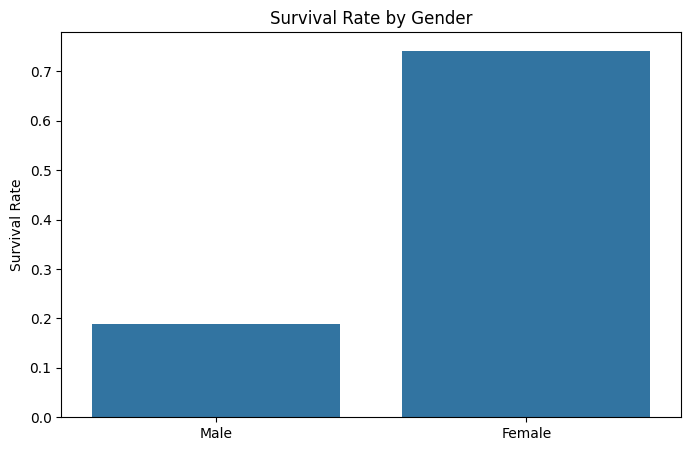

In [ ]:
#5.2: Survival Rate by Gender
survival_by_gender = titanic.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_by_gender)

# Visualizing survival rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x=['Male', 'Female'], y=survival_by_gender)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()


Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


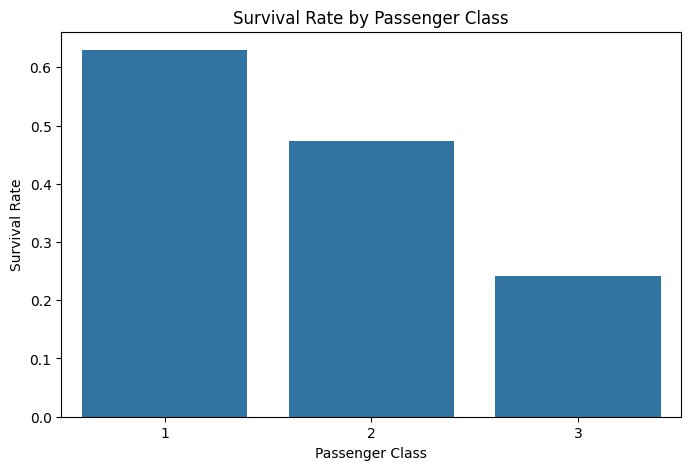

In [ ]:
#5.3: Survival Rate by Class
survival_by_class = titanic.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Class:")
print(survival_by_class)

# Visualizing survival rate by class
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

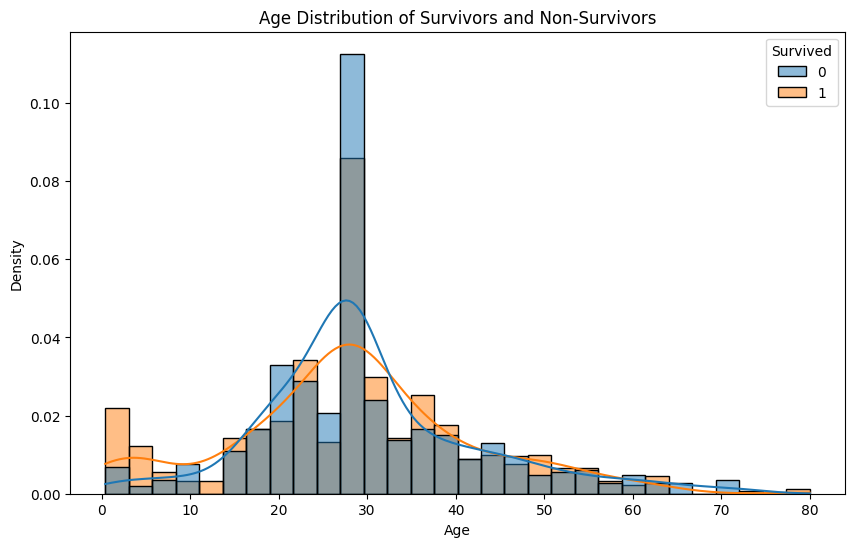

In [ ]:
# Part 5.4: Age Distribution of Survivors and Non-Survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True, stat="density", common_norm=False)
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
